In [25]:
import pandas as pd

In [26]:
df = pd.read_csv('../src/main/custom/vitals.csv')

In [27]:
df.head()

,timestamp,patient_id,diastolic_bp,systolic_bp,heart_rate,respiratory_rate,oxygen_saturation,state_label
0,2025-01-01T19:00:00,b317e7ee-8af7-3e9c-3e0f-646395b8c81a,80.2,118.9,75.0,16.5,98.1,0
1,2025-01-01T19:00:05,b317e7ee-8af7-3e9c-3e0f-646395b8c81a,79.9,118.9,75.5,15.8,97.9,0
2,2025-01-01T19:00:10,b317e7ee-8af7-3e9c-3e0f-646395b8c81a,80.3,119.7,74.0,16.3,97.9,0
3,2025-01-01T19:00:15,b317e7ee-8af7-3e9c-3e0f-646395b8c81a,80.8,120.2,73.6,16.1,98.0,0
4,2025-01-01T19:00:20,b317e7ee-8af7-3e9c-3e0f-646395b8c81a,79.9,118.6,75.1,16.1,98.0,0


In [28]:
df.state_label.value_counts()

state_label
0     7751580
1     1114500
2      707640
16     401280
5      300000
4      278700
12     264720
11     231840
8      170220
10     153000
3      149580
6      140460
7      136320
14      92280
9       91260
15      47220
13      25080
Name: count, dtype: int64

In [29]:
df.shape, df.patient_id.nunique()

((12055680, 8), 4186)

In [30]:
df.timestamp.min(),df.timestamp.max()

('2025-01-01T19:00:00', '2025-06-25T07:59:55')

In [31]:
# Get the time difference to earliest timestamp for each patient

# Convert 'timestamp' to datetime if not already
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Create a new column for the corrected timestamps
df['corrected_timestamp'] = df.groupby('patient_id')['timestamp'].transform(lambda x: x - x.min())

# Display the DataFrame to verify the new column
print(df.head())

            timestamp                            patient_id  diastolic_bp  \
0 2025-01-01 19:00:00  b317e7ee-8af7-3e9c-3e0f-646395b8c81a          80.2   
1 2025-01-01 19:00:05  b317e7ee-8af7-3e9c-3e0f-646395b8c81a          79.9   
2 2025-01-01 19:00:10  b317e7ee-8af7-3e9c-3e0f-646395b8c81a          80.3   
3 2025-01-01 19:00:15  b317e7ee-8af7-3e9c-3e0f-646395b8c81a          80.8   
4 2025-01-01 19:00:20  b317e7ee-8af7-3e9c-3e0f-646395b8c81a          79.9   

   systolic_bp  heart_rate  respiratory_rate  oxygen_saturation  state_label  \
0        118.9        75.0              16.5               98.1            0   
1        118.9        75.5              15.8               97.9            0   
2        119.7        74.0              16.3               97.9            0   
3        120.2        73.6              16.1               98.0            0   
4        118.6        75.1              16.1               98.0            0   

  corrected_timestamp  
0     0 days 00:00:00  
1     0 

Filtering DataFrame to include only records with state label == 16...
Counting death occurrences per timestamp...
Counting total occurrences per timestamp in the original DataFrame...
Calculating the percentage of death occurrences...
Preparing to plot the results...


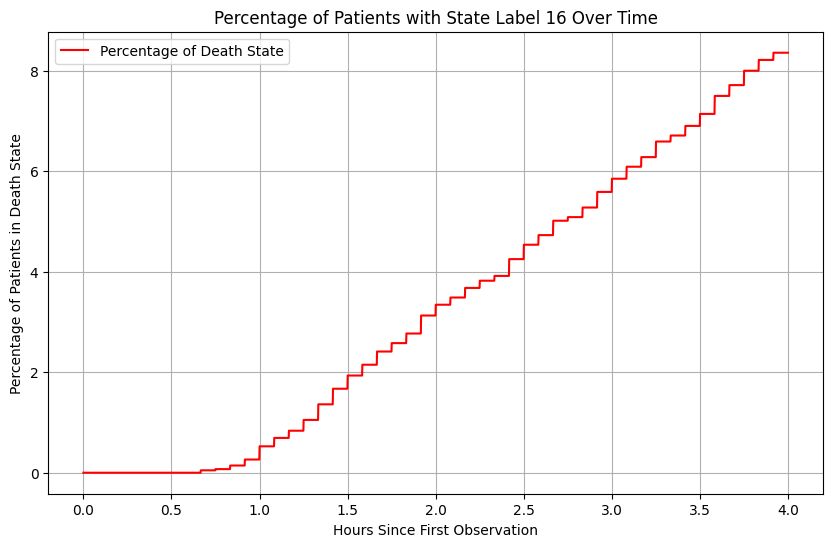

Plotting complete.


In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'corrected_timestamp' is already a timedelta and 'state_label' is in the correct format
df['state_label'] = df['state_label'].astype('category')

# Create a filtered DataFrame with only state label == 16
print("Filtering DataFrame to include only records with state label == 16...")
df_death = df[df['state_label'] == 16][['corrected_timestamp', 'state_label']]

# Counting occurrences of death per timestamp
print("Counting death occurrences per timestamp...")
death_counts = df_death.groupby('corrected_timestamp').size()

# Counting total entries per timestamp in the original data
print("Counting total occurrences per timestamp in the original DataFrame...")
total_counts = df.groupby('corrected_timestamp').size()

# Calculate the percentage of deaths
print("Calculating the percentage of death occurrences...")
death_percentage = (death_counts / total_counts) * 100
death_percentage = death_percentage.fillna(0)  # fill NaN values with 0 where there were no deaths

# Plotting
print("Preparing to plot the results...")
plt.figure(figsize=(10, 6))
plt.plot(death_percentage.index.total_seconds() / 3600, death_percentage, label='Percentage of Death State', color='red')
plt.xlabel('Hours Since First Observation')
plt.ylabel('Percentage of Patients in Death State')
plt.title('Percentage of Patients with State Label 16 Over Time')
plt.legend()
plt.grid(True)
plt.show()
print("Plotting complete.")


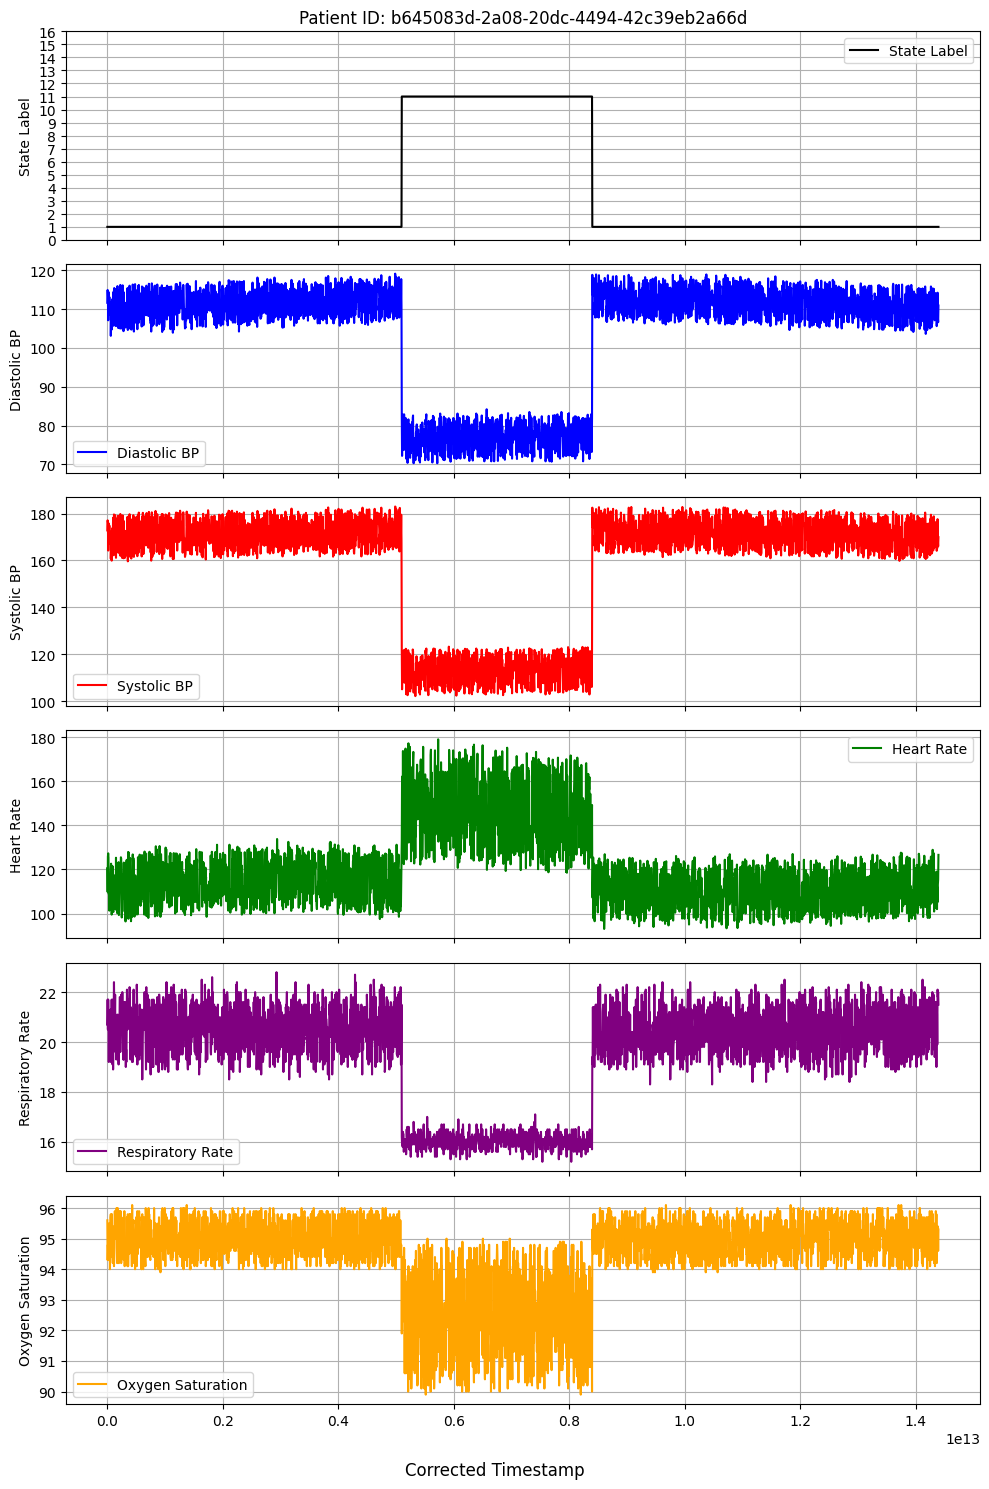

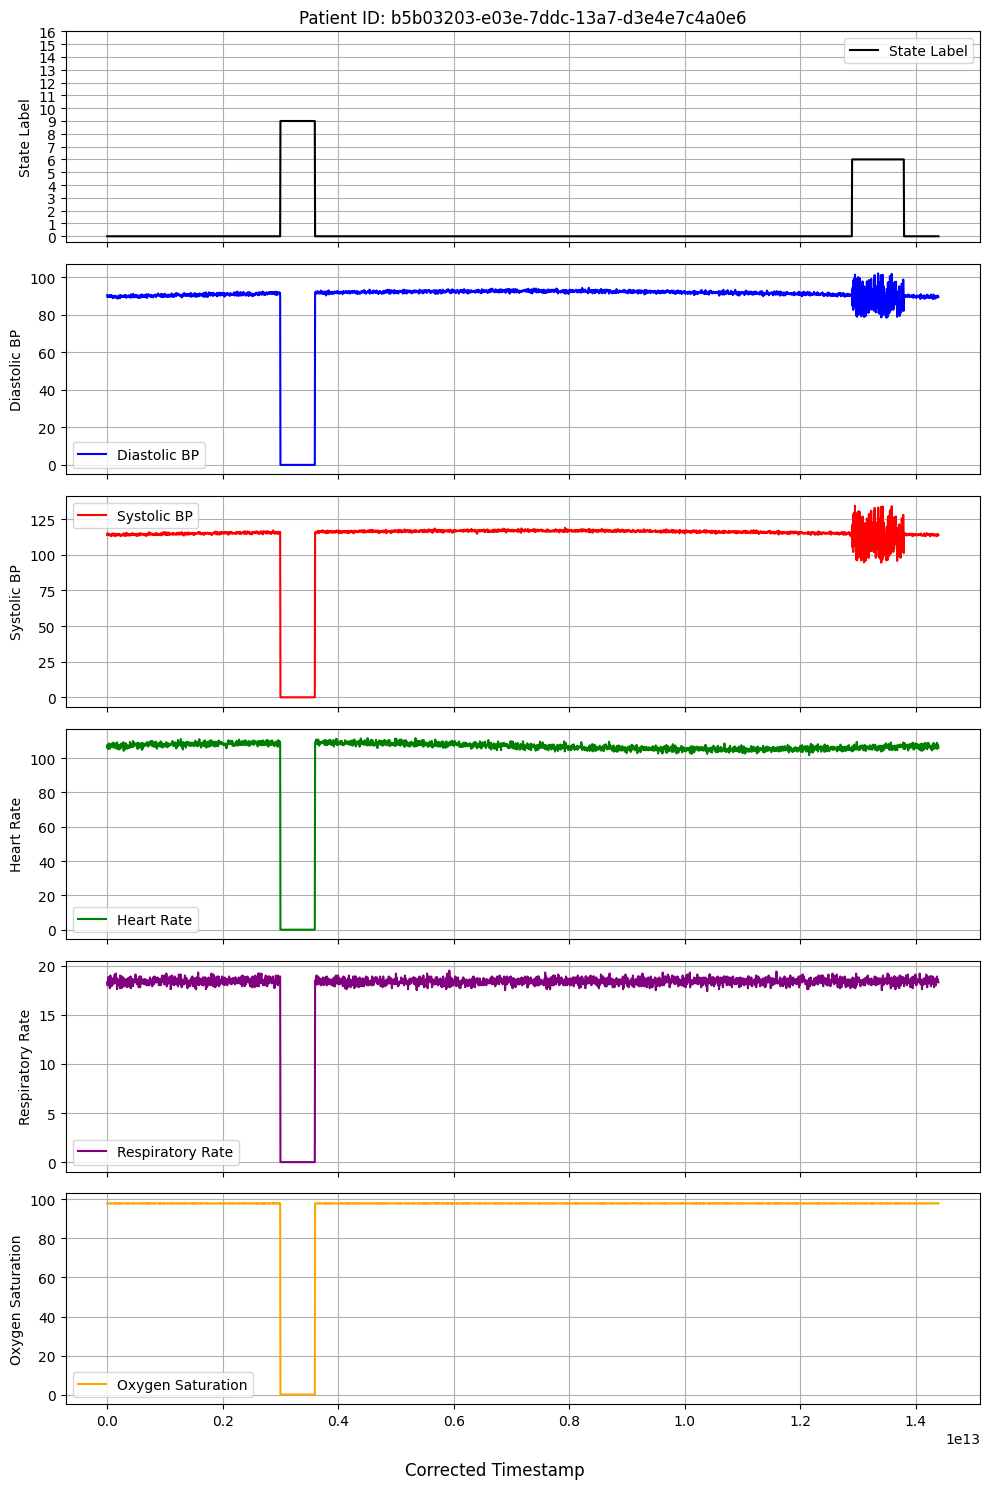

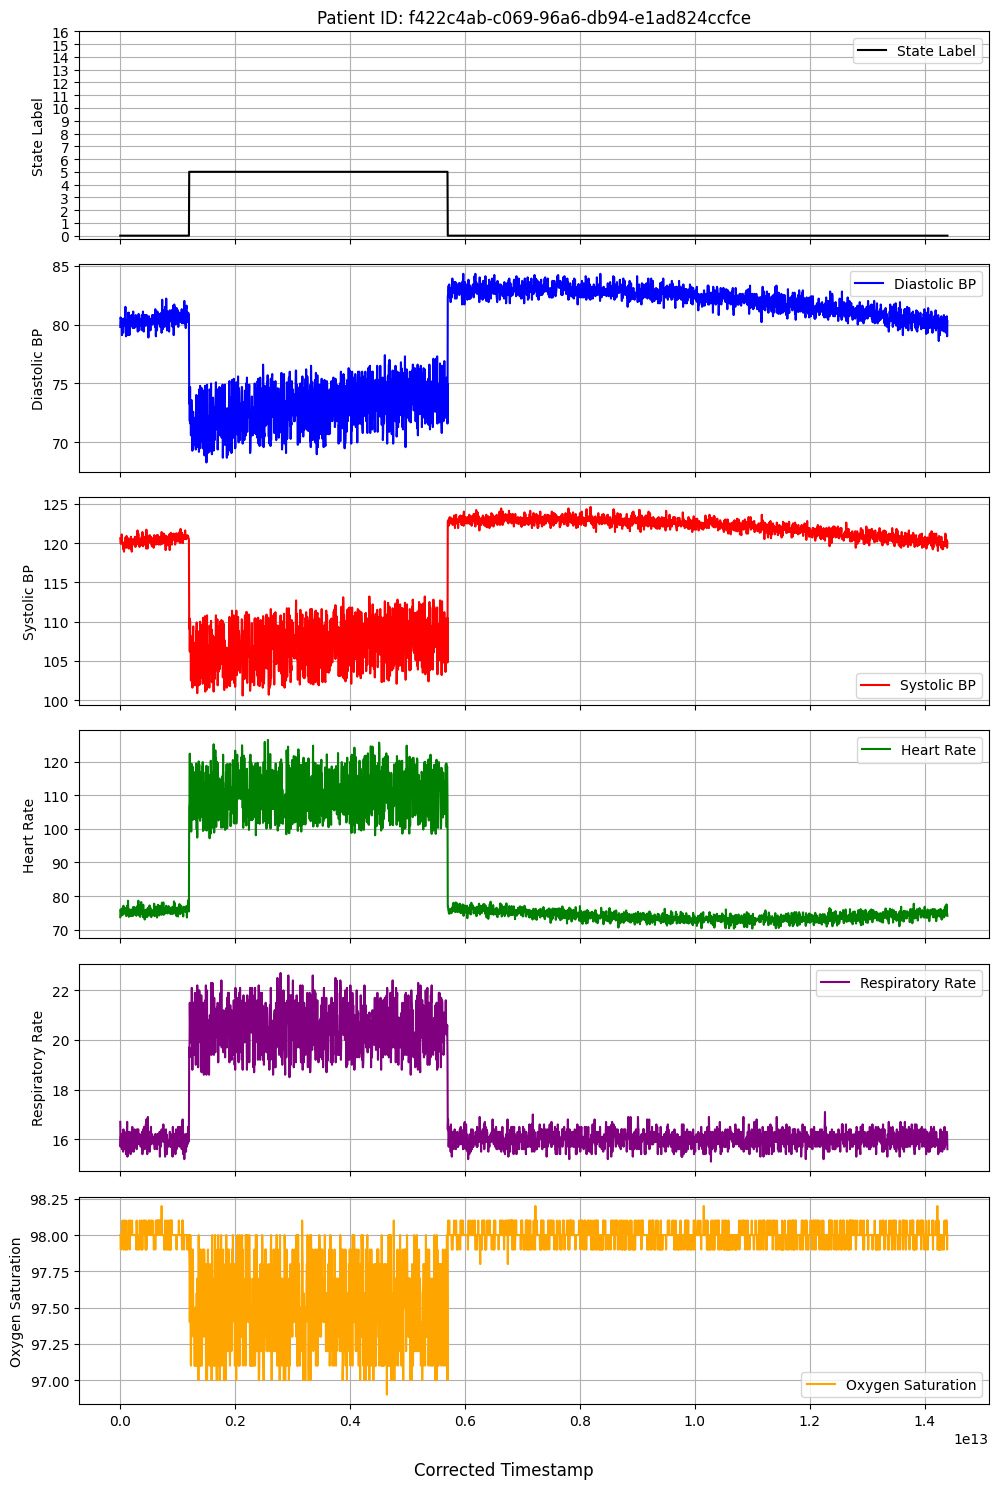

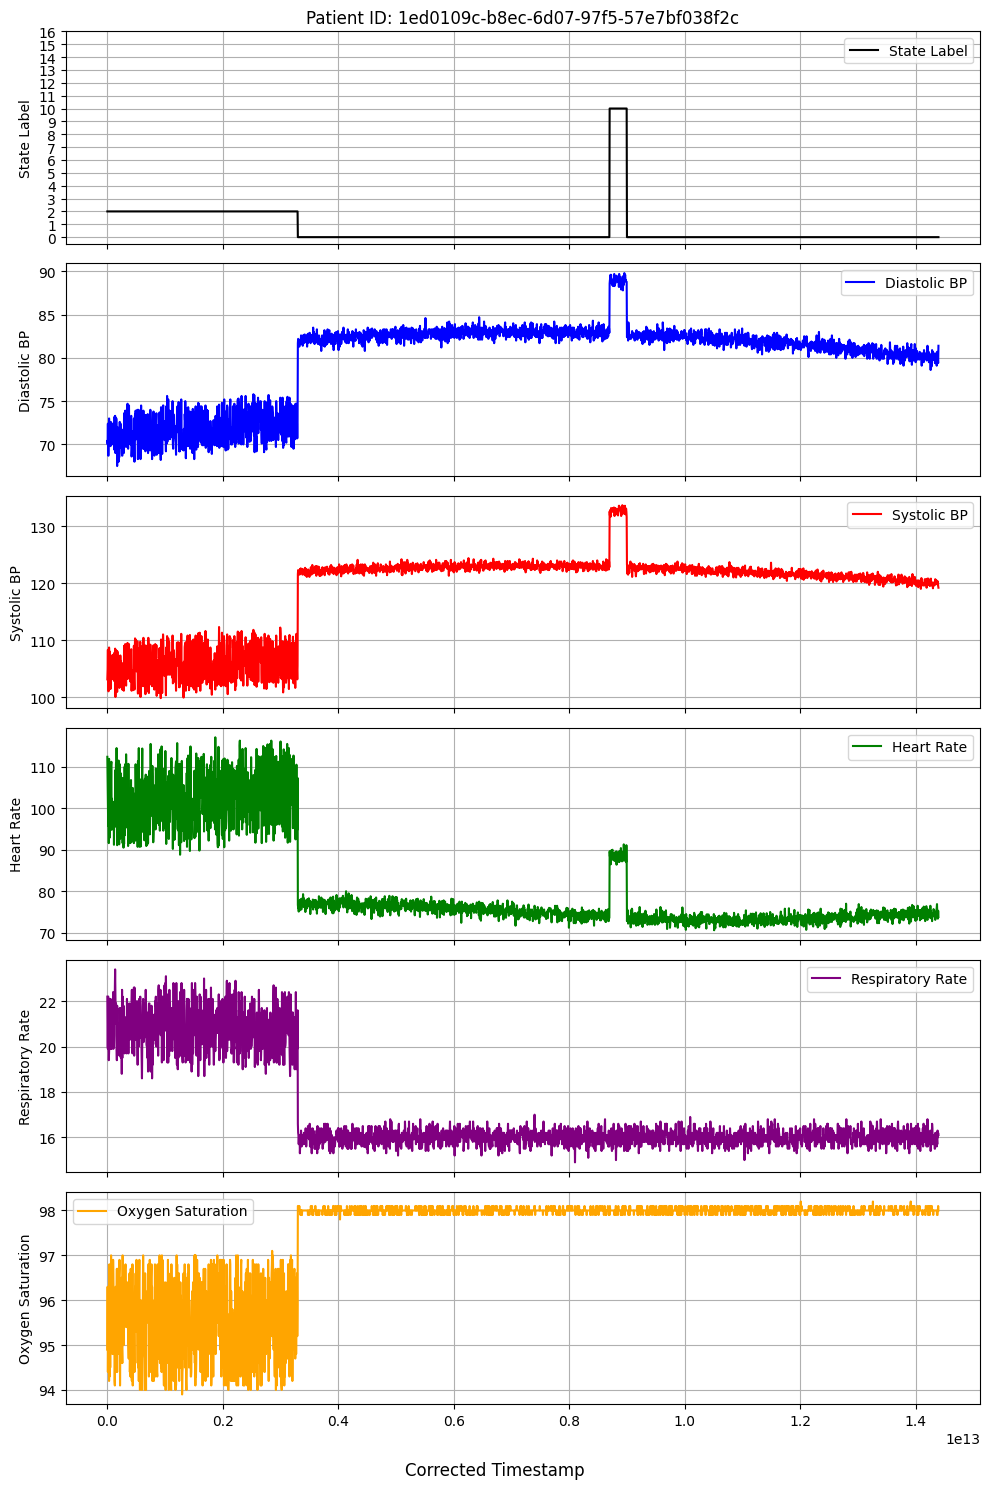

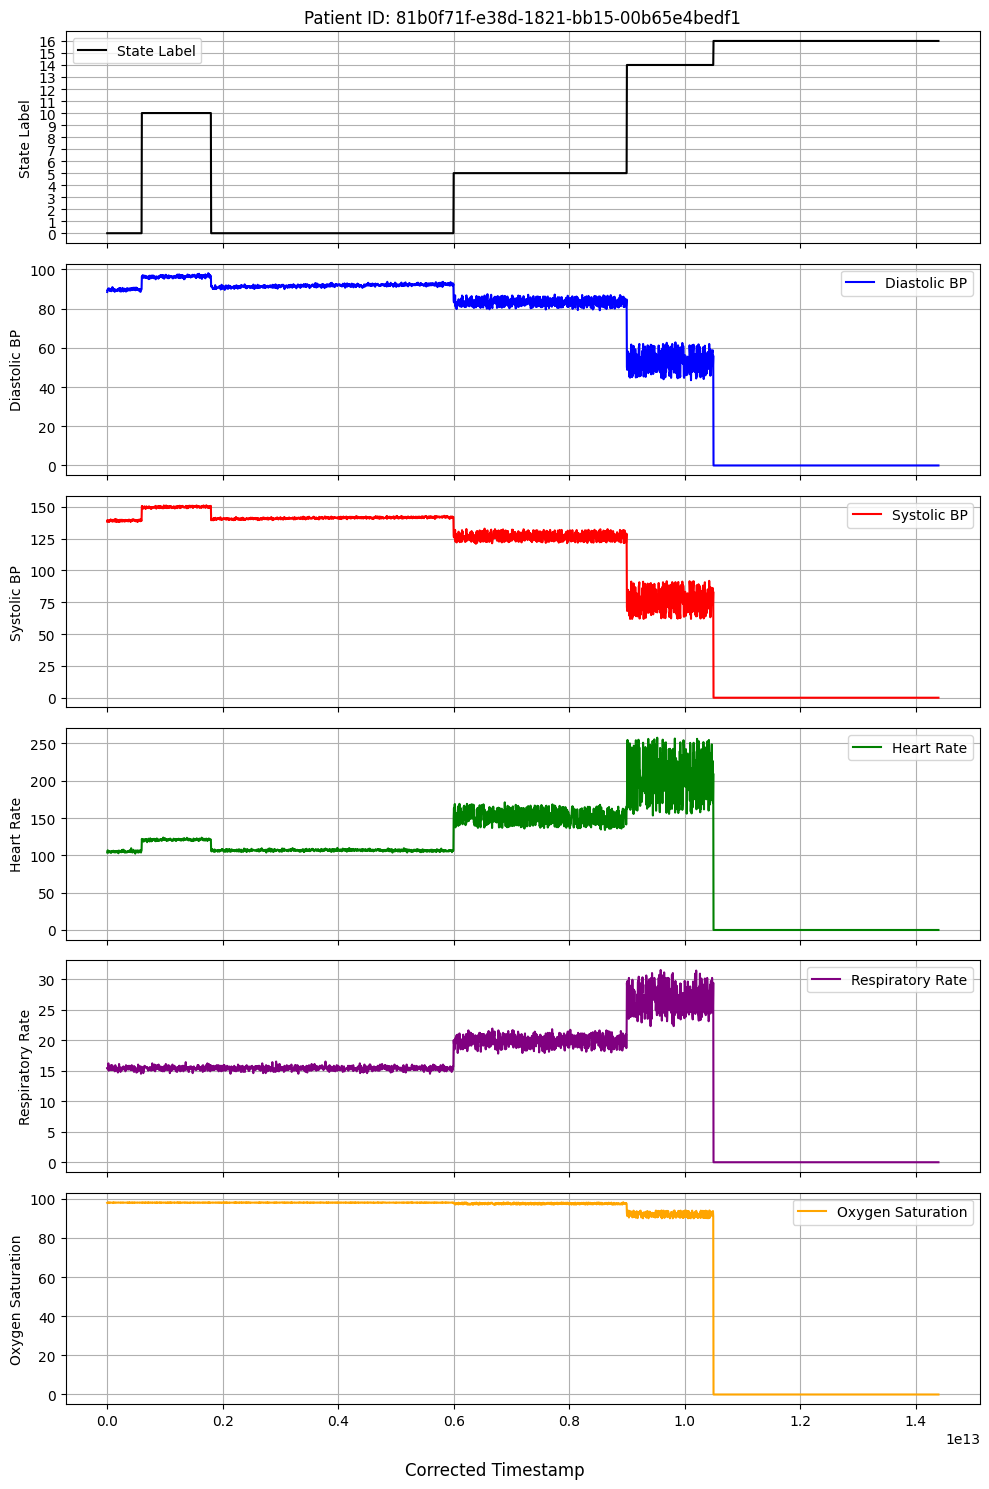

In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Set the seed for reproducibility
np.random.seed(1)

# Assuming df is your DataFrame and is already loaded
unique_patients = df['patient_id'].unique()
selected_patients = np.random.choice(unique_patients, 5, replace=False)

# Define colors for clarity
colors = {
    'diastolic_bp': 'blue',
    'systolic_bp': 'red',
    'heart_rate': 'green',
    'respiratory_rate': 'purple',
    'oxygen_saturation': 'orange'
}

# Loop through the selected patients and create a separate plot for each
for index, patient_id in enumerate(selected_patients):
    patient_data = df[df['patient_id'] == patient_id]
    
    # Create a figure with subplots for each vital sign and the state label
    fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(10, 15), sharex=True)
    
    # Plot state label
    axes[0].plot(patient_data['corrected_timestamp'], patient_data['state_label'], linestyle='-', color='black', label='State Label')
    axes[0].set_ylabel('State Label')
    axes[0].set_title(f'Patient ID: {patient_id}')
    axes[0].set_yticks(np.arange(0, 17, 1))  # Set y-ticks at every integer from 0 to 16
    axes[0].legend()
    axes[0].grid(True)

    # Plot each vital sign
    axes[1].plot(patient_data['corrected_timestamp'], patient_data['diastolic_bp'], color=colors['diastolic_bp'], label='Diastolic BP')
    axes[1].set_ylabel('Diastolic BP')
    axes[1].legend()
    axes[1].grid(True)

    axes[2].plot(patient_data['corrected_timestamp'], patient_data['systolic_bp'], color=colors['systolic_bp'], label='Systolic BP')
    axes[2].set_ylabel('Systolic BP')
    axes[2].legend()
    axes[2].grid(True)

    axes[3].plot(patient_data['corrected_timestamp'], patient_data['heart_rate'], color=colors['heart_rate'], label='Heart Rate')
    axes[3].set_ylabel('Heart Rate')
    axes[3].legend()
    axes[3].grid(True)

    axes[4].plot(patient_data['corrected_timestamp'], patient_data['respiratory_rate'], color=colors['respiratory_rate'], label='Respiratory Rate')
    axes[4].set_ylabel('Respiratory Rate')
    axes[4].legend()
    axes[4].grid(True)

    axes[5].plot(patient_data['corrected_timestamp'], patient_data['oxygen_saturation'], color=colors['oxygen_saturation'], label='Oxygen Saturation')
    axes[5].set_ylabel('Oxygen Saturation')
    axes[5].legend()
    axes[5].grid(True)
    
    # Set common x-axis label
    fig.supxlabel('Corrected Timestamp')
    plt.tight_layout()
    plt.show()
